# 🎯 K-Nearest Neighbors (KNN)

---

## 📚 **Core Concept**
**Lazy learning** algorithm that classifies/predicts based on the **k closest neighbors** in feature space. No explicit training phase - stores all data points.

---

## 🔄 **Algorithm Flow**

### **Prediction Process:**
1. **Calculate distances** from query point to all training points
2. **Select k nearest** neighbors
3. **Classification**: Majority vote among k neighbors
4. **Regression**: Average (or weighted average) of k neighbors

### **Mathematical Framework:**
For query point $x_q$:

**Classification:**
$$\hat{y} = \text{mode}\{y_i : x_i \in N_k(x_q)\}$$

**Regression:**
$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x_q)} y_i$$

**Weighted Version:**
$$\hat{y} = \frac{\sum_{x_i \in N_k(x_q)} w_i \cdot y_i}{\sum_{x_i \in N_k(x_q)} w_i}$$

where $w_i = \frac{1}{d(x_q, x_i)}$ or $w_i = e^{-d(x_q, x_i)}$

---

## 📏 **Distance Metrics**

### **Minkowski Distance (General Form):**
$$d(x,y) = \left(\sum_{i=1}^p |x_i - y_i|^q\right)^{1/q}$$

### **Common Variants:**
- **Euclidean** (q=2): $d(x,y) = \sqrt{\sum_{i=1}^p (x_i - y_i)^2}$
- **Manhattan** (q=1): $d(x,y) = \sum_{i=1}^p |x_i - y_i|$
- **Chebyshev** (q=∞): $d(x,y) = \max_i |x_i - y_i|$

### **Other Metrics:**
- **Cosine**: $d(x,y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}$
- **Hamming**: For categorical data
- **Mahalanobis**: $d(x,y) = \sqrt{(x-y)^T S^{-1} (x-y)}$

---

## ⚙️ **Key Parameters**

### **Choosing k:**
| k Value | Effect | Pros | Cons |
|---------|--------|------|------|
| **k=1** | Nearest neighbor | Simple, flexible boundaries | Sensitive to noise |
| **Small k** | More flexible | Captures local patterns | High variance |
| **Large k** | Smoother boundaries | Reduces overfitting | May underfit |
| **k=n** | Global average | Maximum smoothing | Ignores local structure |

### **Optimal k Selection:**
```python
# Cross-validation approach
from sklearn.model_selection import cross_val_score
k_scores = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
optimal_k = k_range[np.argmax(k_scores)]
```

---

## 🚀 **Algorithm Variants**

### **1. Weighted KNN:**
Closer neighbors have more influence:
$$w_i = \frac{1}{d(x_q, x_i)^2}$$ or $w_i = e^{-\frac{d(x_q, x_i)^2}{2\sigma^2}}$

### **2. Radius-based Neighbors:**
Use all points within radius $r$:
$$N_r(x_q) = \{x_i : d(x_q, x_i) \leq r\}$$

### **3. Condensed KNN:**
Reduce training set size while maintaining accuracy

---

## ⚡ **Computational Complexity**

| Phase | Time Complexity | Space Complexity |
|-------|----------------|------------------|
| **Training** | $O(1)$ | $O(nd)$ |
| **Prediction** | $O(nd)$ naive | $O(nd)$ |
| **With Index** | $O(d \log n)$ | $O(nd)$ |

### **Acceleration Techniques:**

#### **1. KD-Tree:**
- **Best for**: Low dimensions (d < 20)
- **Complexity**: $O(d \log n)$ average case
- **Problem**: Curse of dimensionality

#### **2. Ball Tree:**
- **Better for**: Higher dimensions
- **Metric**: Any distance metric
- **Complexity**: $O(d \log n)$

#### **3. LSH (Locality Sensitive Hashing):**
- **Best for**: Very high dimensions
- **Approximate**: Trade accuracy for speed
- **Complexity**: $O(d)$ query time

---

## 📊 **Advantages vs Disadvantages**

### ✅ **Advantages:**
- **Simple to understand** and implement
- **No assumptions** about data distribution
- **Naturally handles** multi-class problems
- **Adapts to new data** without retraining
- **Non-parametric** and flexible
- **Good baseline** for comparison

### ❌ **Disadvantages:**
- **Computationally expensive** at prediction time
- **Sensitive to curse of dimensionality**
- **Requires feature scaling**
- **Sensitive to irrelevant features**
- **Memory intensive** (stores all data)
- **No interpretable model**

---

## 🛠️ **Implementation**

```python
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Preprocessing (crucial for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Classification
knn_clf = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',  # or 'uniform'
    algorithm='auto',    # 'ball_tree', 'kd_tree', 'brute'
    metric='euclidean'
)
knn_clf.fit(X_scaled, y)
predictions = knn_clf.predict(X_test_scaled)

# Get probabilities
probabilities = knn_clf.predict_proba(X_test_scaled)
```

---

## 🎯 **Best Practices**

### **1. Feature Scaling:**
```python
# Always scale features!
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()  # Zero mean, unit variance
# or
scaler = MinMaxScaler()    # Scale to [0,1]
```

### **2. Feature Selection:**
```python
# Remove irrelevant features
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)
```

### **3. Dimensionality Reduction:**
```python
# For high-dimensional data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_reduced = pca.fit_transform(X)
```

---

## 🎯 **When to Use KNN**

### ✅ **Good for:**
- **Small to medium datasets** (< 100K samples)
- **Low to moderate dimensions** (< 20 features)
- **Non-linear decision boundaries**
- **Multi-modal distributions**
- **Recommendation systems**
- **Anomaly detection**

### ❌ **Avoid when:**
- **Large datasets** (> 1M samples)
- **High dimensions** without preprocessing
- **Real-time applications** (unless using approximate methods)
- **Imbalanced datasets** (without proper handling)

---

## 🔧 **Advanced Techniques**

### **1. Handling Imbalanced Data:**
```python
# Weighted KNN
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
```

### **2. Distance Learning:**
- **Metric Learning**: Learn optimal distance function
- **LMNN**: Large Margin Nearest Neighbor
- **Mahalanobis Distance**: Account for feature correlations

### **3. Ensemble Methods:**
```python
# Bagged KNN
from sklearn.ensemble import BaggingClassifier
bagged_knn = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=10
)
```

---

## 📈 **Performance Tips**
- **Cross-validate k** on validation set
- **Use odd k** for binary classification (avoid ties)
- **Consider local outlier removal**
- **Approximate methods** for large-scale applications
- **Feature engineering** often more important than parameter tuning

When using knn algorithm, make sure that you make all the data on the same scale for example standard scaler (normalization)

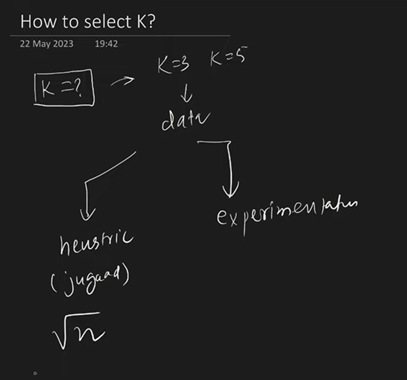

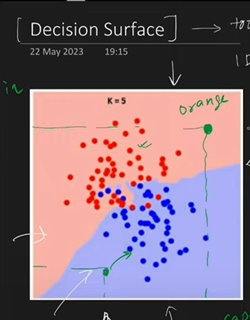

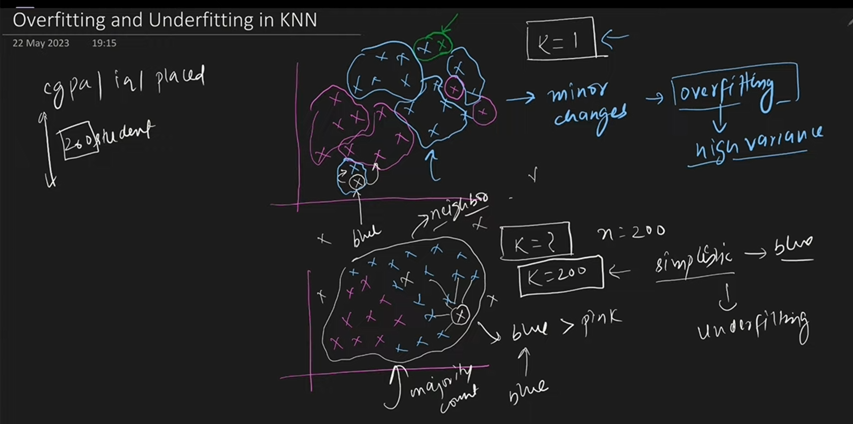

Low k value - Overfitting

High k value - Underfitting

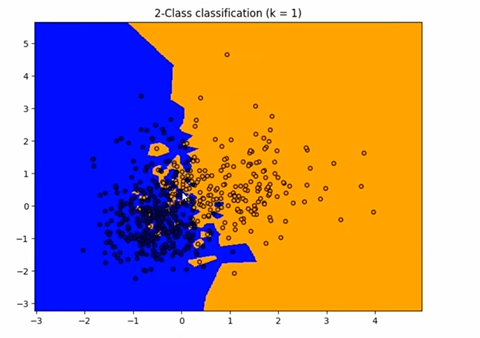

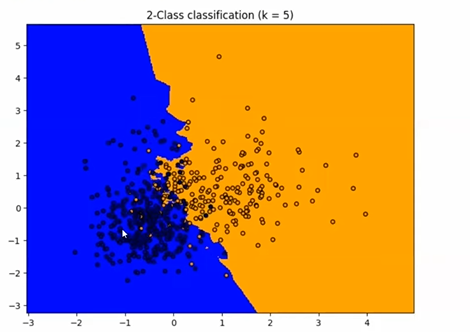

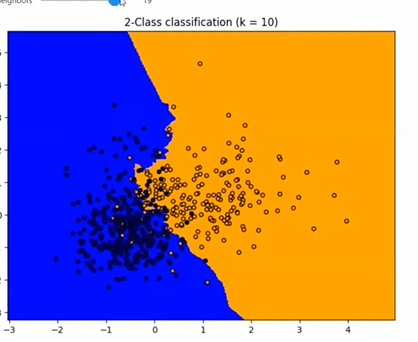

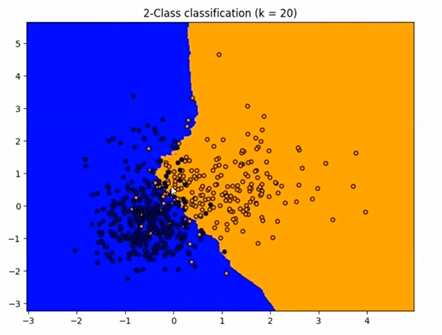

## Failures of kNN

1) Can't be used for large datasets
2) Distance is not very reliable in higher dimensions
3) Non-homogenous data (not on the same scale)
4) Imbalanced dataset
5) Using kNN for inference is not good as it is for predictionn
6) Outliers messes with the model

You can't say which features are important